## Machine Learning Demonstration- NLP


## Requirements
The following python packages are required to run this notebook:
  1. beautifulsoup4: ``` pip install beatifulsoup4 ```
  2. Metaphone: https://pypi.python.org/pypi/Metaphone/0.4
  3. spacy: ```pip install -U spacy```
  4. numpy: ```pip install numpy```
  
You also need to run this line in the terminal to download the English model :  ``` python -m spacy download en ```

or you can install these packages using : ```pip install -e nlpDirectory ```

### Natural language processing
Natural language processing (NLP) can be used to answer a variety of questions about unstructured text data, as well as facilitating open-ended exploration. It can be applied to datasets such as emails, online articles and comments, tweets, or novels. Although the source is text, transformations are applied to convert this data to vectors, dictionaries and symbols which can be handled very effectively by q. Many operations such as searching, clustering, and keyword extraction can all be done using very simple data structures, such as feature vectors and bag-of-words representations.

### Preparing text
In natural language processing, a collection of documents is called a corpus, with the plural being corpora.
Text often comes with associated metadata. For e-mails, this could be the sender and receivers, the date sent, and any labels applied. For online comments, this could include a user name, rating, and URL. As these are often relevant to the analysis, it is convenient to store the plain text and metadata together in a table, with a row for every document, where a document could be as simple as a tweet or text message. 

Once the plain text has been retrieved, operations common to many higher-level NLP operations can be done. These operations include tokenization, sentence detection, part-of-speech recognition, parsing, named entity recognition, and sentiment analysis.

* Tokenization - This operation splits the words e.g John’s > John is one token and ‘s is another token.
* Sentence detection-gives characters at where the sentence starts and ends
* Part of speech tagger- parses the sentences into tokens and gives each token a given label eg lemma,pos,tag etc 
* Parsing-  Assign dependency labels
* Lemmatization converts it to a base form eg ran (vb) to run(verb)
* Named entity recognition which identifies people,locations, organisations,geo political entity etc. For example ,this would return who U.K is. 
* Using a prebuilt model of the degrees of positive and negative sentiment for English words and emoticons, as well as parsing to account for negation, adverbs and other modifiers, sentences can be scored for their negative, positive and neutral sentiment.

Universal and Penn Treebank tags are both supported: http://universaldependencies.org/u/pos/

In [2]:
/loading in the NLP library
\l loadnlp.q

Loading utils.q
Loading regex.q
Loading sent.q
Loading parser.q
Loading time.q
Loading date.q
Loading email.q
Loading cluster.q
Loading nlp.q


## Loading in the dataset

Moby-Dick is an 1851 novel by American writer Herman Melville. The book is sailor Ishmael's narrative of the obsessive quest of Ahab, captain of the whaling ship Pequod, for revenge on Moby Dick, the white whale that on the ship's previous voyage bit off Ahab's leg at the knee. Taken from https://en.wikipedia.org/wiki/Moby-Dick. 


This dataset can be found at: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm

In [3]:
text: "\n" sv read0 `:datasets/books/mobydick.txt;
removeBadNewlines:{@[x; 1 + (raze string x = "\n") ss "010"; :; " "]};
mobyDick:(text ss "CHAPTER ") cut removeBadNewlines text

### Parsing the dataset

field    | content
---------|------------------------------------------------------------------
`text    | The original word text, returns a list of characters
`tokens  | The tokenized text,returns a list of symbols
`sentChars| Indices of start and end of sentences, returns a list of lists of longs
`sentIndices| Indices of the first token of each sentences, returns a list of integers
`pennPOS | The Penn Treebank tagset,returns a list of symbols
`uniPOS | The Universal tagset, returns a list of symbols
`lemmas | The base form of the word, returns a list of symbols
`isStop | Is the token part of the stop list? returns a boolean
`likeEmail| Does the token resembles an email ? returns a boolean
`likeURL| Does the token resembles a URL ? returns a boolean
`likeNumber| Does the token resembles a number ? returns a boolean
`keywords| the significance of each term, returns a list of dictionaries
`starts| Index that a token starts at, returns a long


In [4]:
/ creating a parsed table  
myparser:.nlp.newParser[`en;`text`tokens`lemmas`pennPOS`isStop`sentChars`starts`sentIndices`keywords] 
corpus:myparser mobyDick

In [ ]:
\p 4321

In [5]:
/print the first chapter
-1 corpus[0]`text;

CHAPTER 1

  Loomings



Call me Ishmael.  Some years ago--never mind how long precisely-- having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.  It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can.  This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship.  There is nothing surprising in thi

### Exploratory Analysis

We find for all the proper nouns in the first chapter. .nlp.findPOSRuns finds runs of consecutive tokens whose part of speech is in the first argument and the specific document is in the second argument. 

In [6]:
\c 30 100
/ to find all the proper nouns
.nlp.findPOSRuns[`pennPOS;`NNP`NNPS;corpus 0][;0]

`loomings`ishmael`november`cato`manhattoes`circumambulate`sabbath`go`corlears hook`coenties`white..


## Feature vectors
Feature vectors are dictionaries of terms and their associated weights. The values associated with each term in a feature vector are how significant that term is as a descriptor of the entity. The significance of the word is calculated by comparing the frequency of the word in that document compared to the rest of the corpus.

As this is a book, we treat this dataset as a single document other than a collection of documents, we use the keywordsContinuous function to find the most significant words.

In [7]:
show 10#keywords:.nlp.keywordsContinuous corpus

ahab     | 65.23191
peleg    | 52.21875
bildad   | 46.56072
whale    | 42.72953
stubb    | 38.11739
queequeg | 35.34769
steelkilt| 33.96713
pip      | 32.90067
starbuck | 32.05286
thou     | 32.05231


We can see the terms that occur the most are the names of the three captions on a boat and "whale". Below we plot the occurrences per chapter of the top 10 keywords in Moby Dick reveals a discontinuity from chapters 32 to 45, which are an aside discussing whale biology.

In [11]:
/creating a table with the average occurence of the top 10 keywords in each chapter
show 5#tab:raze{([]term:x;chapter:til count corpus;occurences:5 mavg sum each corpus[`tokens]=x)}each key 10#keywords

term chapter occurences
-----------------------
ahab 0       0         
ahab 1       0         
ahab 2       0         
ahab 3       0         
ahab 4       0         


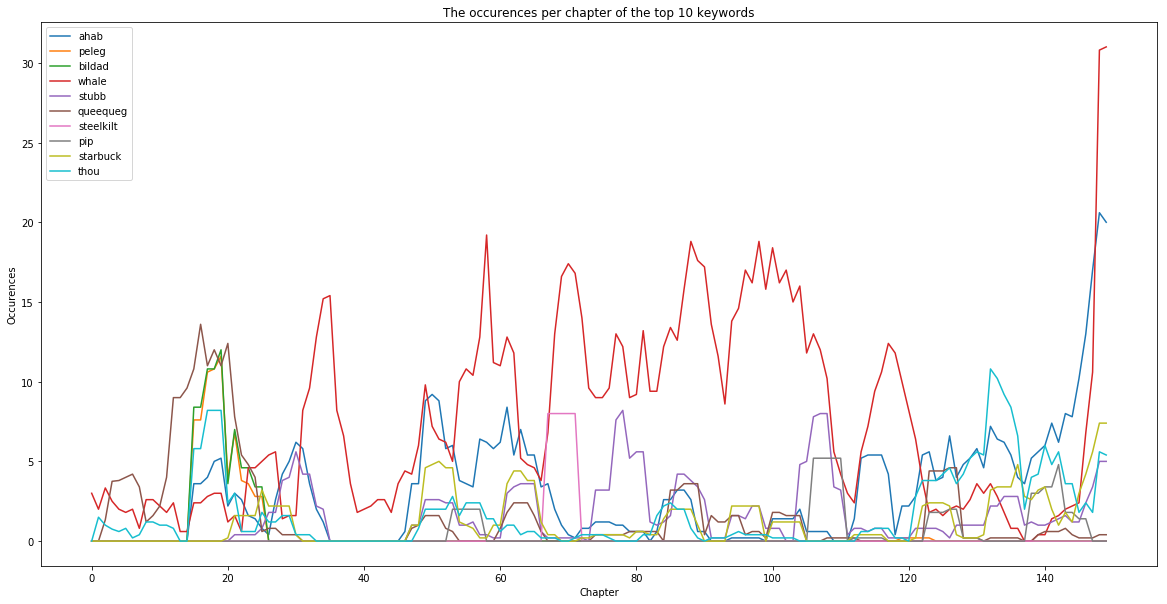

In [12]:
/can use the moving average to smooth out the plot
/ploting the occurence of the top terms per chapter
plt:.p.import[`matplotlib.pyplot]
plt[`:figure][`figsize pykw 20 10];
{a:exec chapter from tab where term=x;b:exec occurences from tab where term=x;plt[`:plot][a;b];}each key 10#keywords; 

plt[`:title]["The occurences per chapter of the top 10 keywords"];
plt[`:ylabel]`Occurences;
plt[`:xlabel]`Chapter;
plt[`:legend][key 10#keywords;`loc pykw "upper left"];
plt[`:show][];

### Calculating feature vectors for words

The feature vector for a word can be calculated as a collection of how well other words predict the given keyword. The weight given to these words is a function of how much higher the actual co-occurrence rate is from the expected co-occurrence rate the terms would have if they were randomly distributed.

.nlp.findRelatedTerms finds terms that have occured in the same sentence as the queried word. It returns a dictionary of each related term and their z-score in a descending order. A large z-score indicates that the term occured more frequently than if the term was randomly distributed in the corpus. 

In [11]:
/finding words that relate to captain
5#.nlp.findRelatedTerms[corpus;`captain]

peleg | 1.653247
bildad| 1.326868
ahab  | 1.232073
ship  | 1.158671
cabin | 0.9743517


## Finding related phrases

Phrases can be found by looking for runs of words with an above average significance to the query term. 

In [16]:
/ captain ahab has the largest occurence in this document
.nlp.extractPhrases[corpus;`captain]

"captain ahab"        | 31
"captain peleg"       | 12
"captain bildad"      | 7
"captain sleet"       | 5
"stranger captain"    | 4
"said the captain"    | 3
"sea-captain"         | 2
"whaling captain"     | 2
"captain's cabin"     | 2
"captain ahab,\" said"| 2
"captain pollard"     | 2
"captain d'wolf"      | 2
"way, captain"        | 2


## Sentiment Analysis

Using a prebuilt model of the degrees of positive and negative sentiment for English words and emoticons, as well as parsing to account for negation, adverbs and other modifiers, sentences can be scored for their negative, positive and neutral sentiment. 

* compound value: the overall positive/negative sentiment 
* pos value: the positive sentiment
* neg value: the negative sentiment
* neu value: the neural sentiment. A function of the amount of input having no sentiment value. 

In [15]:
.nlp.sentiment peach ("Three cheers,men--all hearts alive!";"No,no! shame upon all cowards-shame upon them!")

compound   pos       neg       neu      
----------------------------------------
0.7177249  0.5996797 0         0.4003203
-0.8896131 0         0.6977756 0.3022244


In [16]:
sentences: raze .nlp.getSentences peach corpus
/ To avoid trivially short examples, set a minimum length
sentences@: where (count each sentences) > 100
/ Get the most positive sentence
10#sentences idesc (.nlp.sentiment peach sentences)[`pos]

"But the fare was of the most substantial kind--not only meat and potatoes, but dumplings; good h..
"\n\n\"'So help me Heaven, and on my honor the story I have told ye, gentlemen, is in substance a..
" But while hapless Dough-Boy was by nature dull and torpid in his intellects, Pip, though over t..
"I was only alive to the condensed confidential comfortableness of sharing a pipe and a blanket w..
"\n\nHowever, a good laugh is a mighty good thing, and rather too scarce a good thing; the more's..
"So, to my fond faith, poor Pip, in this strange sweetness of his lunacy, brings heavenly voucher..
" Delight,--top-gallant delight is to him, who acknowledges no law or lord, but the Lord his God,..
" For my part, I abominate all honorable respectable toils, trials, and tribulations of every kin..
"And like a sister of charity did this charitable Aunt Charity bustle about hither and thither, r..
"In the serene weather of the tropics it is exceedingly pleasant the mast-head: nay, to a dreamy ..


In [17]:
/ Get the most negative sentence
10#sentences idesc (.nlp.sentiment peach sentences)[`neg]

" To neither love nor reverence wilt thou be kind; and e'en for hate thou canst but kill; and all..
"Damn ye,' cried the Captain, pacing to and fro before them, 'the vultures would not touch ye, ye..
"\n\nThus, while in the life the great whale's body may have been a real terror to his foes, in h..
" Captain Ahab did not name himself .'Twas a foolish, ignorant whim of his crazy, widowed mother,..
"\n\n\"But I am not a brave man; never said I was a brave man; I am a coward; and I sing to keep ..
" With greedy ears I learned the history of that murderous monster against whom I and all the oth..
" Pip, thy wretched laugh, thy idle but unresting eye; all thy strange mummeries not unmeaningly ..
"If your banker breaks, you snap; if your apothecary by mistake sends you poison in your pills, y..
"ye but strike a thing without a lid; and no coffin and no hearse can be mine:--and hemp only can..
" But no doubt the first man that ever murdered an ox was regarded as a murderer; perhaps he was ..


 # NLP applied to the Enron dataset 
 
The Enron email dataset is one of the few if not the only large publicly available dataset of corporate emails. Made available after the Enron trial, it includes the emails of many employees, including c-suite individuals such as former Enron CEOs Jeffrey Skilling and Ken Lay, whose emails will be investigated this in this paper.

These datasets can be found at https://www.cs.cmu.edu/~enron/ 

In [18]:
parseEnronEmail: {[email]
    newlines: where email = "\n";
    
    findTag: {[email; newlines; tag]
        tag: "\n" , tag , ":";
        tagStart: count[tag] + first email ss tag;
        : $[null tagStart;
            "";
            [   tagEnd  : first newlines where tagStart < newlines;
                trim tagStart _ tagEnd # email]];
        }[email; newlines];
    
    : (!) . flip (
        (`date; {$[x~(); 0nd; x < 1980.01.01; 0nd; x]}first first .nlp.findDates findTag "Date");
        (`time;first first .nlp.findTimes findTag "Date");
        (`subject; findTag "Subject");
        (`from; findTag "From");
        (`to; findTag "To");
        (`cc; findTag "Cc");
        (`bcc; findTag "Bcc");
        (`text; (2 + first email ss "\n\n") _ email));
    };

In [19]:
loadEnronEmails:{[path]

    // Import all the files in the directory
    emails:parseEnronEmail each distinct .nlp.loadTextFromDir[path][`text];
    
    // These affect things like comparing documents/finding keywords
    badTokens:.nlp.regex.compile["\n((To|Subject|From|Sent):|=09|=\\?|ANSI| ---)[^\n]*|\\[IMAGE\\]"; 1b];
    regex.replaceAll:{x[`:sub;<][y;z]};
    emails[`text]:regex.replaceAll[badTokens; "";] each emails `text;
    emails[`text]:(emails[`subject] ,\: "\n\n") ,' emails `text;
    
    : emails;
    };

In [20]:
// Load data
myparser:.nlp.newParser[`en;`tokens`lemmas`pennPOS`isStop`text`sentChars`sentIndices`keywords]

jeffemails:distinct loadEnronEmails"./datasets/datasets1/maildir/skilling-j"
jeffcorpus:myparser jeffemails[`text]

In [49]:
layemails:distinct loadEnronEmails"./datasets/datasets1/maildir/lay-k"
count layemails
-1"loaded dataset";
\t laycorpus:myparser layemails[`text]

loaded dataset


3651


78140


In [34]:
laytable:laycorpus,'layemails
cols laytable

`tokens`lemmas`pennPOS`isStop`text`sentChars`sentIndices`keywords`date`time`subject`from`to`cc`bcc


### Comparing Corpora

Enron CEO Jeff Skillings was a member of the Beta Theta Pi fraternity at Southern Methodist University (SMU). If we want to find secret fraternity code words used by the Betas, we can compare his fraternity emails (those containing “SMU” or “Betas”) to his other emails. Sorting terms by their affinity towards the fraternity corpus, the first unusual word, the 10th most polarized word, is “kai”, a greeting and sign-off used in fraternity emails. Also appearing near the top of this list are references to the fraternity’s “Eye of Wooglin” ritual, and the fraternity code word “dorg”.

* compareCorporas is based on the paper "comparing corpora using frequency profiling". Compares the number of occurences of each term between the two corpora. Gives two dictionaries of each terms affinity to each corpus .

In [22]:
fraternity:jeffcorpus i:where (jeffcorpus[`text] like "*Betas*")|jeffcorpus[`text] like "*SMU*"
remaining:jeffcorpus til[count jeffcorpus]except i
summaries:key each 10#/:.nlp.compareCorpora[fraternity;remaining]
/ summary of the fraternity corpus
summaries 0
/summary of the remaining corpus
summaries 1

`beta`homecoming`betas`smu`yahoo`groups`tent`reunion`forget`crowd


`enron`jeff`business`information`please`market`services`energy`management`company


### Calculating feature vectors for documents

The values associated with each term in a feature vector are how significant that term is as a descriptor of the entity. For documents, this can be calculated by comparing the frequency of words in that document to the frequency of words in the rest of the corpus. The intuition which is formalized mathematically is that any term which has a uniform distribution in the corpus will be insignificant, whereas those which appear in clusters will be more significant. The frequency of the term is also a contributing factor to the significance. Thus, any term which is both frequent and clustered will be more significant than those which are infrequent or uniformly distributed. Describing documents this way is a very fast operation and, when run on e-mail length documents, has a throughput of tens of thousands of documents per second.


Sorting the terms in a feature vector by their significance, you get the keywords that distinguish a document most from the corpus, forming a terse summary of the document. This shows a the most significant terms in the feature vector for one of Enron CEO Jeff Skilling’s email’s describing a charity bike ride.

### Jeff Skilling's dataset

In [23]:
where jeffcorpus[`text] like "Ready2Go*"

,1637


In [24]:
/ here is the random email from the dataset
-1 jeffcorpus[where jeffcorpus[`text] like "Ready2Go*"]`text;

Ready2Go

Are you Ready2Go ?

Have you ever experienced problems accessing the network remotely when traveling on business or when trying to work from home on your Enron laptop?  Would you like someone to test and customize the dial-up access on your laptop before you head out of town on your next trip? 

We have identified a need and are now supplying a new service for Corp and EBS employees and it's called Ready2Go !

This new service has been established to test, modify, and update the dial-up software on your laptop.

How it works:

A calendar has been created on ITCentral at <http://itcentral.enron.com/Data/Services/Ready2Go>

Go to the site and schedule a time that is convenient for you. Then, bring your laptop to our testing site, (either at 3AC105 or EB2268D).  We will examine your system, update your software (if needed) and even customize it for the next location you will be traveling to.  We'll also provide a training session in accessing the network remotely with your lapto

In [25]:
/ here we can see that ready2go is the most frequent word
5#desc .nlp.TFIDF[jeffcorpus]2076

writes            | 8.720708
samuraimai@aol.com| 8.507479
shovling          | 7.864036
tomorrow??!!no    | 7.864036
rand=712614615    | 7.864036


### Ken Lay's Dataset

In [26]:
/ here is an email from the dataset
-1 laycorpus[2082]`text;

Demand Ken Lay Donate Proceeds from Enron Stock Sales

Camille Monahan
5141 Caspian Springs Drive 202
Las Vegas, NV 89120
cmonahan_99@yahoo.com

To Mr. Ken Lay,

I'm writing to urge you to donate the millions of dollars you made from selling Enron stock before the company declared bankruptcy to funds, such as Enron Employee Transition Fund and REACH, that benefit the company's employees, who lost their retirement savings, and provide relief to low-income consumers in California, who can't afford to pay their energy bills.  Enron and you made millions out of the pocketbooks of California consumers and from the efforts of your employees.

Indeed, while you netted well over a $100 million, many of Enron's employees were financially devastated when the company declared bankruptcy and their retirement plans were wiped out.  And Enron made an astronomical profit during the California energy crisis last year.  As a result, there are thousands of consumers who are unable to pay their basic ene

In [27]:
/ applying TFIDF to ken lays email
10#desc .nlp.TFIDF[laycorpus]2082

monahan              | 12.71395
camille              | 11.53942
cmonahan_99@yahoo.com| 8.202482
nv                   | 6.591948
caspian              | 6.409352
vegas                | 5.425776
springs              | 5.364876
las                  | 5.364876
drive                | 3.315038
pocketbooks          | 0.8230251


## Searching 

Searching can be done using words, documents, or collections of documents as the query or dataset. To search for documents similar to a given document, you can represent all documents as feature vectors using TF-IDF, then compare the cosine similarity of the query document to those in the dataset and find the most similar documents, with the cosine similarity giving a relevance score. Feature vectors are extremely composable. To search by a collection of documents, just sum the feature vectors for all the elements in the query to get a single vector you can use for searching.

In [28]:
where jeffcorpus[`text] like "Fire Chief Committee*"
queryemail:first jeffcorpus where jeffcorpus[`text] like "Fire Chief Committee*"
-1 queryemail`text;

,309


Fire Chief Committee

Dear Jeff:

    Thank you again for extending me an invitation to be on your committee to
select the new Houston Fire Chief.  I look forward with much enthusiasm and
excitement to working with you and the committee members on this very
important project.

    I enjoyed our visit at the Doubletree immensely. It was great walking
down memory lane and recalling our days in Cambridge. We probably passed each
other at Harvard Square at some point during our time there.  As I said, I am
a great admirer of you and ENRON. The innovation, creativity and unique
(though soon to be widely copied) business plan make ENRON one of Houston's
(and the nation's, maybe also California's in the near future) great assets.

     Since the subject came up in our conversation, I will add a short
personal note. After reviewing several potential transactions this week, it
is quite possible that my partners and I will be entering into a "business
defining" transaction in the next two months

In [29]:
first 1_idesc .nlp.compareDocs[queryemail`keywords]each jeffcorpus`keywords
mostsimilar:jeffcorpus first 1_idesc .nlp.compareDocs[queryemail`keywords]each jeffcorpus`keywords

306


In [30]:
-1 mostsimilar`text;

Select Comm AGENDA - Jan 25-Febr 1

Houston Fire Chief Selection Committee Members: Jeff Skilling - Chairperson, 
Troy Blakeney, Gerald Smith, Roel Campos and James Duke.

Congratulations selection committee members! We have a very important and 
exciting task ahead of us. 

On the agenda for the next week are two important items - (1) the Mayor's 
February 1 news conference announcing the Houston Fire Chief selection 
committee and its members; and (2) coordination of an action plan, which we 
should work out prior to the news conference.

News Conference specifics:
speakers - Mayor Brown and Jeff Skilling
in attendance - all selection committee members
location - Fire Station #6, 3402 Washington Ave.
date - Thursday, February 1, 2001
time - 2pm
duration - approximately 30 minutes

I'd like to emphasize that it would be ideal if all selection committee 
members were present at the news conference. 

I will need bios on each committee member emailed to me by close of business 
Monday, 

When documents are marked as similar, either by a clustering algorithm, or when searching for documents similar to some other document, it may not always be obvious why a result matched, or why it has the relevance score it was given. For any pair of documents or centroids, the list of features can score can be sorted by how much they contribute to the similarity. This example compares two of former Enron CEO Jeff Skilling’s emails, both of which have in common the subject of selecting Houston’s next fire chief.


### Comparing feature vectors 

The cosine similarity of two vectors is the dot product of two vectors over the product of their magnitudes. It is a standard distance metric for comparing document. When documents are marked as similar, either by a clustering algorithm, or when searching for documents similar to some other document, it may not always be obvious why a result matched, or why it has the relevance score it was given. For any pair of documents or centroids, the list of features can score can be sorted by how much they contribute to the similarity. 

The explainSimilarity function calculates how much each shared term contributre to the cosine similarity and sorts it in descending order. 

In [32]:
/ returns what terms contribute to the similarity
10#.nlp.explainSimilarity . jeffcorpus[`keywords]306 309

fire     | 0.2589689
roel     | 0.1456452
committee| 0.1299962
mayor    | 0.1295498
station  | 0.09343284
chief    | 0.06902333
select   | 0.04327823
important| 0.03843478
members  | 0.03538933
plan     | 0.02464972


### Finding outliers

The centroid of a collection of documents is the average of their feature vectors. As such, documents close to the centroid are representative, while those far away are the outliers. Given a collection of documents, finding outliers can be a quick way to find interesting documents, those that have been mis-clustered, or those not relevant to the collection.
	
The emails of former Enron CEO Ken Lay contain 1124 emails with a petition. Nearly all of these use the default text, only changing the name, address and email address. To find those petitions which have been modified, sorting by distance from the centroid gives emails where the default text has been completely replaced, added to, or has had portions removed, with the emails most heavily modified appearing first.

In [35]:
petition:laycorpus where laytable[`subject] like "Demand Ken*"
centroid:sum petition`keywords
.nlp.i.compareDocToCentroid[centroid]each petition`keywords
iasc .nlp.i.compareDocToCentroid[centroid]each petition`keywords
outliers:petition iasc .nlp.i.compareDocToCentroid[centroid]each petition`keywords

0.2853626 0.2295249 0.3090485 0.2462073 0.3213344 0.2441444 0.3221303 0.2775526 0.2612595 0.29101..


54 15 11 235 277 272 163 752 861 232 970 88 587 992 815 507 964 418 946 1062 255 406 1076 1040 92..


Sorting the petitions by distance from centroid reveals many angry and threatening emails from Enron stockholders following the scandal, which are outliers due to their colourful language otherwise absent from the corpus, with sentences such as “The world, and possibly the afterworld, demand your repentence” and "I hope your ill-gotten gains do not serve you in any good way".

In [36]:
/showing an email that is classed as an outlier
-1 (outliers 0)`text;

Demand Ken Lay Donate Proceeds from Enron Stock Sales

Gordon Wiltsie
Bozeman, MT
gw@alpenimage.com

To Mr. Ken Lay,

In the interest of saving your own soul (not to mention the ability to sleep at night) I urge you to donate the millions of dollars you made from selling Enron stock to such funds as the Enron Employee Transition Fund.  I recommend that you encourage your fellow executives to do the same.  Whether you are religious or not, karma is a very real force in this universe.   God or no god, your actions will have consequences for both you and the nation for decades into the future. The world, and possibly the afterworld, demand your repentence.  Do you really want to go to Hell?

If there is a shred of honor in your life, you will make amends for selling $101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.  Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded deali

## Clustering

When exploring a set of documents, a very useful operation is clustering. This will show the major themes in a dataset, allowing you to focus in on relevant areas, and filter out sections of the dataset that are not related to the analysis.

Clusters can be summarized by their centroids, which are the sum of the feature vectors of all the documents they contain. Centroids are useful for giving a quick summary of a cluster’s contents. k-means allow you to specify the number of clusters.

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. We measure the feature similarity using the cosine similarity. 



### Finding the cluster cohersion
As clustering a dataset may result in hundreds of clusters, it is helpful to be able to sort the results by quality. The cohesiveness of a cluster is a measure of how similar the documents are within that cluster.  It is calculated as the mean sum of squares error, which aggregates each document’s distance from the centroid. Sorting by cohesiveness will give very focused clusters first. Sorting by cluster size is also useful, as this will show the larger themes within the dataset.


### Summarize

In [37]:
clusters:.nlp.cluster.summarize[jeffcorpus;15]

format: {[corpus; clusters]
    // Get the most relevant descriptors of each cluster
    summaries: {[docs]
        : (!) . flip (
            (`size; count docs);
            (`cohesion; .nlp.cluster.MSE docs);
            (`keywords; enlist key .nlp.i.takeTop[10] avg docs));
        } each corpus[`keywords] clusters;

    // Remove any outliers
    summaries: select from summaries where size > 1;
    
    // Sort by cohesion
    : summaries idesc summaries[`cohesion];
    };

format[jeffcorpus;clusters]

size cohesion   keywords                                                                         ..
-------------------------------------------------------------------------------------------------..
40   0.7273915  notional enrononline counterparties daily transactions summary average transactin..
42   0.684975   notification violation memo erv viewing published named website revision publishe..
17   0.5980157  peer mapping opened ene oxley links excercise friday prc remapping               ..
23   0.5272334  murdock erica jerry harris unauthorized dinners printout forbidden error destroy ..
40   0.5066996  intranet enrononline reports secured login appear http://eolinfo.enron.com dropdo..
6    0.4122863  gap violation maturity notification memo http://erv.corp.enron.com/linkfromexcel...
33   0.4012164  goal raise slipped incredibly pledge ms150 well consideration lon helping        ..
30   0.392309   ewooglin intelligence seti shack extraterrestial terrestial yahoogroup betas reun..


The IEEE VAST 2014 Challenge includes a collection of fictional news articles describing protests around corporate polution of groundwater and a related kidnapping. You can download it from http://vacommunity.org/VAST+Challenge+2014%3A+Mini-Challenge+1#Available_Data


### MCL Clustering 

In [43]:
article:.nlp.loadTextFromDir ["./datasets/datasets1/MC1Data/articles"][`text]
articlecorpus:myparser article

In [45]:
compare: {[similarity]
    clusters: .nlp.cluster.MCL[articlecorpus; similarity; 0b];
    : `size`cohesion!(
        avg count each clusters;
        avg .nlp.cluster.MSE each articlecorpus[`keywords] clusters);
    };

compare each .07 .1 .2 .3 .4 .5 .6

size     cohesion 
------------------
20.975   0.371042 
12.24638 0.4287604
7.609091 0.4940294
5.675862 0.5151633
4.940397 0.5552837
3.942029 0.6339462
2.816    0.7250066


## Analysing emails from a range of specific dates  

In [40]:
/function to extract significant words from a range of dates
summarizeWindow:{[d;w]
    target:select from d where date within w;
    history:select from d where not date within w;
    : key first .nlp.compareCorpora[target;history];
 };

In [41]:
summarizeWindow[jeffcorpus;2000.04.26 2000.05.06]

`chuck`closer`ms`chuck.paul@a-closer-look.com`paul`homecoming`http://www.a-closer-look.com`paul@a..


In [42]:
summarizeWindow[jeffcorpus;2001.03.10 2001.03.13]

`california=01,s`fms`prevented`state=01,s`solutions`elected`eddie`deer`mcbride`utp`valley`market=..


In [43]:
summarizeWindow[jeffcorpus;2001.02.24 2001.02.26]

`lisa`interview`candidates`questions`troy`pre`lisa.connolly@enron.com`suggestions`roel`connolly`q..


### Sentiment analysis

We will extract the sentences from each email and find the most positive and negative sentences in the emails. The most positive email was congratulating Jeff on his new job and  his engagment to Rebecca Carter, a former vice president for board communications and board secretary at Enron.


In [48]:
sentences: 10000#{x where (count each x) < 200} raze .nlp.getSentences each jeffcorpus;
scores: .nlp.sentiment each sentences;
10#sentences idesc scores `compound
10#sentences iasc scores `compound


"Request from Better Business Bureau\n\nDear Jeff:\n\nI would like to invite you to honor us as t..
"\n\nShep Moyle, chairman of the seminar, is winner of the 1999 Best of the Best \nYPO Internatio..
"Forbes-Milken Institute Best Places Ranking\n\nDear Friend: \n\nThe 3rd annual Forbes-Milken Ins..
"\n\nWe also intend to publish a special  supplement that will provide Awards \nwinners with an e..
"\n\nFirst, I would like to thank you for making this company the great place it \nis today, and ..
"\n\nFirst, I would like to thank you for making this company the great place it \nis today, and ..
"\n\nFirst, I would like to thank you for making this company the great place it \nis today, and ..
"\n\nI hate to harp on these details but it is vital that everyone help out to\nensure that you h..
"\n\nI hate to harp on these details but it is vital that everyone help out to\nensure that you h..
"Congratulations\n\n      Dear Jeff;  We just saw the great news------ CONGRATULATIONS."


" She \nadded the sales wrong on the cash register, she charged the wrong prices for \nitems, she..
"Heard no gun fire or bomb blasts from the nearby hills, where \nrecently some Albanian rebels co..
"\n>          The wire services are reporting the official death toll at\n>      10,204--but add ..
" I suspect the tower isn't nearly half as\nbothered by these kid's budding pyromania as me, sinc..
"\nStating that I will be paid for vacation less any I take between now and the \nseverance date ..
"In addition to finding Dallas County liable for its treatment\nof Lawson, Buchmeyer ordered the ..
"\n>The government, the army and construction contractors are being severely\n>criticized in the ..
" I passed three men loading sagging plastic sacks, no\ndoubt full of the spoils of a recent kill..
"There are many troubles which make\nthe rank and file veterans see a terrible failure of this de..
" I knew a few people there\nand, with my poor Turkish, learned that in was really bad in Izmit, ..


### Reading in Mbox files to q.

The MBOX file is the most common format for storing email messages on a hard drive. The NLP library has the capability to read in Mbox files and constructs a table of parsed emails.

The columns that consist in the table are


column   | content
---------|------------------------------------------------------------------
`sender | list of chars containing the name and email address of the sender
`to |  list of chars containing the name and email address of the reciever/recievers
`date| timestamp of the date
`subject| list of chars containing the subject of the email
`text| list of chars containing the text of the email
`contentType|list of chars containing the content type of the email
`payload| payload



In [49]:
Mboxemails:.nlp.email.getMboxText "/home/fionnuala/benLP/nlpSrc/datasets/tdwg.mbox"
Mboxemails

sender                                                                  to                       ..
-------------------------------------------------------------------------------------------------..
"Roger Hyam" "roger@tdwg.org"                                           ,("";"Tdwg-img@lists.tdwg..
"Kevin Richards" "RichardsK@landcareresearch.co.nz"                     ,("";"tdwg-img@lists.tdwg..
"Bob Morris" "ram@cs.umb.edu"                                           (("Kevin Richards";"Richa..
"Ricardo Scachetti Pereira" "ricardo@tdwg.org"                          (("";"tdwg-tapir@lists.td..
"Ricardo Scachetti Pereira" "ricardo@tdwg.org"                          (("";"tdwg-tapir@lists.td..
"Ricardo Scachetti Pereira" "ricardo@tdwg.org"                          (("";"tdwg-tapir@lists.td..
"Bob Morris" "Robert.Morris@cs.umb.edu"                                 (("";"tdwg-img@lists.tdwg..
"" "Donald.Hobern@csiro.au"                                             (("";"tdwg@lists.tdwg.org..


The following function returns a table of who emailed who and the amount of times they emails eachother. This gives us an insight of who was communicating the most in the directory.  

In [50]:
.nlp.email.getGraph[Mboxemails]

sender                           to                               volume
------------------------------------------------------------------------
roger@tdwg.org                   Tdwg-img@lists.tdwg.org          1     
RichardsK@landcareresearch.co.nz tdwg-img@lists.tdwg.org          1     
ram@cs.umb.edu                   RichardsK@landcareresearch.co.nz 1     
ram@cs.umb.edu                   tdwg-img@lists.tdwg.org          2     
ricardo@tdwg.org                 tdwg-tapir@lists.tdwg.org        3     
ricardo@tdwg.org                 tdwg-process@lists.tdwg.org      3     
ricardo@tdwg.org                 tdwg-img@lists.tdwg.org          3     
ricardo@tdwg.org                 tdwg-obs@lists.tdwg.org          3     
ricardo@tdwg.org                 tdwg-tag@lists.tdwg.org          3     
ricardo@tdwg.org                 tdwg-lit@lists.tdwg.org          3     
ricardo@tdwg.org                 a.rissone@nhm.ac.uk              3     
ricardo@tdwg.org                 leebel@netspace.ne

In [50]:
\pwd 

"/Users/Fionnuala/nlp"
